# Example Data Notebook for TAQ Database


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
import collections
from itertools import chain
import matplotlib.pyplot as plt
import configobj


from scripts.query_helpers import client_connection
from scripts.preprocess import clean_trades,clean_quotes,chunk_clean


### Personal Details

Access information will be stored within an env file

In [2]:
config = configobj.ConfigObj(".env")
host = config["host"]
server_user = config["server_user"]
server_password = config["server_password"]
db_user = config["db_user"]
db_pass = config["db_pass"]


### Setup the client connection to the DB

In [3]:
conn = client_connection(
   host,server_user,server_password,db_user,db_pass
)

### Example Trade Query

Includes support for multiple exchanges  (Required by the Order Protection Rule)

In [4]:
exchange="'N'"
symbol='AAPL'
start= "2020-01-01"
end="2020-01-10"


In [5]:
result,path=conn.client_get_trades(exchange,symbol,start,end)

INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_8.2p1)
INFO:paramiko.transport:Authentication (password) successful!


Trade Query for 'N' AAPL 2020-01-01 2020-01-10


/home/jbohne/.conda/envs/query_user/lib/python3.10/site-packages/clickhouse_sqlalchemy/drivers/base.py:268: SAWarning: Did not recognize type 'DateTime64(9, 'America/New_York')' of column 'Time'
  warn("Did not recognize type '%s' of column '%s'" %
INFO:paramiko.transport.sftp:[chan 1] Opened sftp connection (server version 3)


In [6]:
trades=pd.read_csv(path)
trades=clean_trades(trades)
trades

,SIP_Timestamp,Exchange,Symbol,Trade_Volume,Trade_Price,Sale_Condition,Source_of_Trade,Trade_Correction_Indicator,Sequence_Number,Trade_Id,Trade_Reporting_Facility,Trade_Through_Exempt_Indicator,date
2020-01-02 09:30:00.623737,2020-01-02 09:30:00.624116,N,AAPL,50,296.23,@ I,N,0,20937,4,,0,2020-01-02
2020-01-02 09:30:00.836030,2020-01-02 09:30:00.836409,N,AAPL,22,296.25,@ I,N,0,21461,5,,0,2020-01-02
2020-01-02 09:30:01.073451,2020-01-02 09:30:01.073828,N,AAPL,31,296.26,@ I,N,0,22138,6,,0,2020-01-02
2020-01-02 09:30:01.261133,2020-01-02 09:30:01.261512,N,AAPL,3,296.27,@ I,N,0,22340,7,,0,2020-01-02
2020-01-02 09:30:01.293901,2020-01-02 09:30:01.294279,N,AAPL,31,296.25,@ I,N,0,22448,8,,0,2020-01-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-09 15:59:54.908801,2020-01-09 15:59:54.909178,N,AAPL,100,309.58,@,N,0,3596804,9103,,0,2020-01-09
2020-01-09 15:59:56.008760,2020-01-09 15:59:56.009140,N,AAPL,100,309.60,@,N,0,3599045,9104,,0,2020-01-09
2020-01-09 15:59:56.126238,2020-01-09 15:59:56.126615,N,AAPL,9,309.58,@ I,N,0,3599260,9105,,0,2020-01-09
2020-01-09 15:59:57.006042,2020-01-09 15:59:57.006420,N,AAPL,100,309.58,@,N,0,3600354,9106,,0,2020-01-09


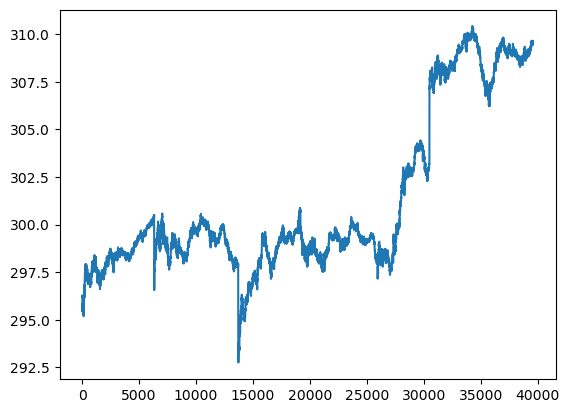

In [7]:
plt.plot(trades['Trade_Price'].values)

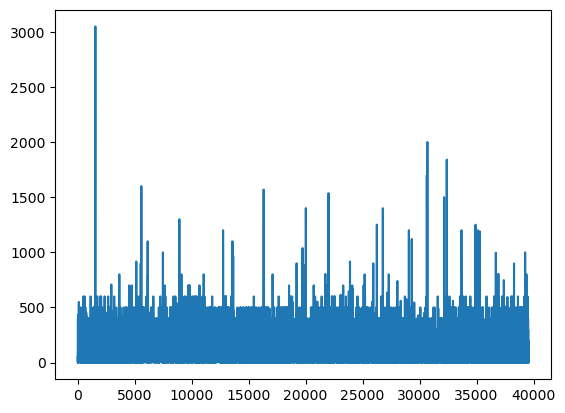

In [8]:
plt.plot(trades['Trade_Volume'].values)

### Example Quote Query

Includes support for multiple exchanges (Required by the Order Protection Rule)

In [9]:
exchange="'N'"
symbol='AAPL'
start= "2020-01-01"
end="2020-01-03"

In [10]:
conn = client_connection(
   host,server_user,server_password,db_user,db_pass
)

### Loop through multiple days without server timeout

In [12]:
conn.get_quotes_range(exchange,symbol,start,end)

INFO:paramiko.transport:Connected (version 2.0, client OpenSSH_8.2p1)
INFO:paramiko.transport:Authentication (password) successful!


Quote Query for 'N' AAPL 2020-01-01 2020-01-02


/home/jbohne/.conda/envs/query_user/lib/python3.10/site-packages/pandas/core/arrays/datetimelike.py:1189: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  warnings.warn(


['N']


INFO:paramiko.transport.sftp:[chan 1] Opened sftp connection (server version 3)


Saved Quotes for AAPL on 2020-01-01 00:00:00
Quote Query for 'N' AAPL 2020-01-02 2020-01-03
['N']


INFO:paramiko.transport.sftp:[chan 1] sftp session closed.


Saved Quotes for AAPL on 2020-01-02 00:00:00


### Chunk Clean Large Dataframes

In [13]:
chunk_clean('data/AAPL_quotes_2020-01-02')

100000 rows cleaned
